In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

In [4]:
# 3. Insert sample data (optional - only run once to avoid duplicates)
sample_data = [
    ("Laptop", 5, 800),
    ("Monitor", 10, 150),
    ("Keyboard", 20, 30),
    ("Mouse", 25, 20),
    ("Laptop", 3, 800),
    ("Monitor", 5, 150),
    ("Keyboard", 10, 30),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [5]:
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
df

,product,total_qty,revenue
0,Keyboard,30,900.0
1,Laptop,8,6400.0
2,Monitor,15,2250.0
3,Mouse,25,500.0


<Figure size 800x500 with 0 Axes>

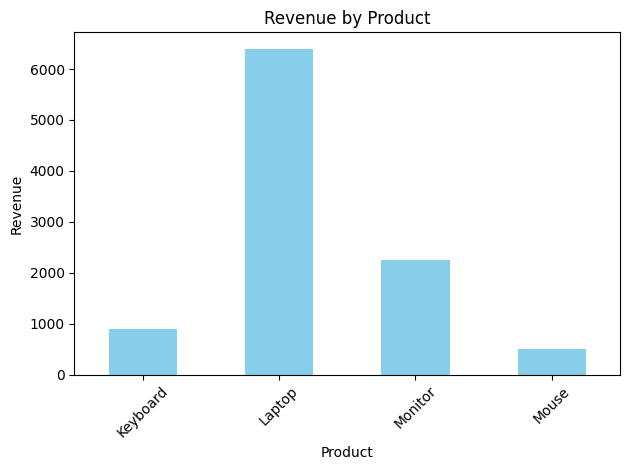

In [6]:
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()
